# COGS 108 Final Project
#### **1. Overview:**
Team 080

In this project, we will be analyzing data of patients who have been diagnosed with cardiovascular disease. Our aim is to further understand the causes of cardiovascular disease as well as to develop an algorithm that is able to non-invasively predict and diagnose such conditions. First we explore and visualize the distributions of different features in the dataset, including age, BMI, systolic and diastolic blood pressure. Secondly we evaluate and compare different classifiers (Linear Regression, Logistic Regression, Principle Component Analysis and Support Vector Machines) and identify which is best able to predict cardiovascular disease in this dataset.
#### **2. Names:**
 * Syed Zain Ali Baquar (A12732391)
 * Qingsheng Ge (A15541533)
 * Jeffrey Feng (A15507377)
 * Shengjie Mao (A15531892)
 * Grace Cheong (A16176085)

#### **3. Research Question**

Our study will be centered around these two questions: What are the principal indicators of cardiovascular disease? To what accuracy are we able to diagnose these diseases? 

#### **4. Hypothesis**

Using Support Vector Machines, we postulate that we are able to predict an instance of cardiovascular disease in an observation to an accuracy > 70% and a Type I Error of < 20%. It is asserted that there exist at least 3 major indicators of cardiovascular disease. 

#### **5. Background and Prior Work**

* **Background**

Cardiovascular diseases (CVDs) have emerged as a leading cause of death. According to the World Health Organization(WHO), 17 .9 million people die from CVDs every year, which is approximately 31 % of deaths worldwide. Through research, it has shown that the occurrence of CVDs is not random; they are often correlated with various factors such as smoking, family history, diet and access to health care services. By studying past record, it will aid us in the understanding of factors correlated with CVDs. 

Symptoms of CVDs include chest discomfort and shortness of breath which are often overlooked by many patients themselves. Many patients only find out about their condition after experiencing near-fatal symptoms. With proper technological data science tools, medical professionals are able to turn large datasets into crucial information that aid the process of making informed decisions and prediction. Early diagnosis during regular check-ups is integral in saving many lives through prevention and treatments. While researching for our topic, we came across a similar project "A Hybrid Intelligent System Framework for the Prediction of Heart Disease Using Machine Leaming Algorithms" https://doi.org/10.1155/2018/3860146. Their project tested different approaches and algorithms with the goal of evaluating their performance. Obesity has been known to cause diabetes, high blood pressure, high cholesterol, all of which are factors leading to CVDs. Hence, We decided to focus our project on the correlation of obesity and CVDs. 

* **Prior Work**

https://doi.org/10.1155/2018/3860146. While researching for our topic, we came across a similar project "A Hybrid Intelligent System Framework for the Prediction of Heart Disease Using Machine Leaming Algorithms"  Their project tested different approaches and algorithms with the goal of evaluating their performance. 

https://www.healthline.com/health/heart-disease/tests-diagnosis#noninvasive-tests This article discussed the different diagnostic tests that doctors used to diagnose cardiovascular disease. By having an understanding of what the different tests accounted for, it allowed our group to make a better interpretation of the data.





#### **6. Dataset(s)**

* Dataset Name: Cardiovascular Disease dataset 
* Link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset 
* Number of Observations: 70000 

Cardiovascular Disease dataset includes possible factors that may cause the disease. There are 13 columns to this dataset. They are ID, age (in days), height, weight, gender, systolic 
blood pressure, diastolic blood pressure, cholesterol ( degree compared with normal), GLUC level, smoking (whether patients smoke or not), alcohol intake (in binary feature), physical activity (in binary feature), and presence or absence of cardiovascular disease. 

All of these values 
were collected at the moment of the medical examination. 
Since we are going to find out principal indicator(s) of cardiovascular disease, we will 
use all the data included in the dataset and will try to find out which variable(s) is/are the most direct or important indicator(s). 






**Privacy & Ethical Considerations**

From the background part above, we understand that there are many factors, like age, weight and gender, can indicate the potential of having cardiovascular disease. But some of them have no significant influence or maybe there are some third variables may contribute to the disease. Hence, in this project, we are going to analyze and visualize the dataset we obtained and try to find out principle indicators that can help us to diagnose the disease.

We obtain the dataset for project from a website called Kaggle and it gives us access for using and downloading its databases. According to the dataset's "Usability" part, it has public kernel, which indicates that we can use it for this project.

Even though the dataset is made for public use, we still take consideration for possible privacy problems. Since information related to illuness is important for patients, we do not want them to be influenced by our research. Therefore, when cleaning data, we drop the information about patients' id, which, according to Safe Harbor Method, may reveal patients' real names or other private information if people apply their IDs to other datasets. 

While other elements in the dataset are essential for our analysis and they do not have specific information related to patients' privacy, we did not exclude them from the dataset.

However, since the dataset does not include information across all ages and only contains patients ages range from 35 to 65, we may have bias toward people ages in these range. So the analysis may not be applicable for people younger or older than the range we covered. 

We take careful consideration for the analysis so besides the existing bias in data and we minimize the danger of exposing patients' privacy.  

In [0]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm

import sklearn as sk
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import copy

## Datasets

Cardiovascular Dieases dataset https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
```
id          - ID number  
age         - days
gender      - 1 - women, 2 - men  
height      - (unit: cm)  
weight      - (unit: kg)  
ap_hi       - Systolic blood pressure  
ap_lo       - Diastolic blood pressure  
cholesterol - 1: normal, 2: above normal, 3: well above normal  
gluc        - 1: normal, 2: above normal, 3: well above normal  
smoke       - whether patient smokes or not  
alco        - whether patient drinks or not
active      - whether patient exercises or not 
cardio      - Target variable (binary, presence of cardiovascular disease)
```

In [39]:
# Loading dataset
try:
  # hackish loading directly from github, because google collab doesn't have a file system
  cvd_dir = "https://raw.githubusercontent.com/COGS108/group080/master/datasets/cvd_dataset/cardio_train.csv?token=ALDKPSKXL4M3O7Y4P6LLQPS57F3OQ"
  df = pd.read_csv(cvd_dir, sep=';')
except:
  df = pd.read_csv("cvd_dataset/cardio_train.csv", sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


We will first see if there are any null values inside of the table as they may cause problems during the analysis.

In [40]:
# Check Null values
df.isnull().values.any()

False

It seems like we do not have any null values in the table. Therefore, we can continue with data visualization and data cleaning. First of all though, we will drop the ID column as unnessary column and change the year column so we will have year as unit.

In [0]:
# Drop ID column and add age_year column
if "id" in df:
    df = df.drop("id", axis = 1)
df["age_year"] = df["age"].map(lambda age: round(age / 365))

# Data Visualization & Simple Exploration
Having a closer look at the data can have reveal insights otherwise missed in numbers. Below are some plots exploring the dataset.



### Age Distribution
We can make a simple histogram on the distribution of patients' age in the dataset. Diagram below shows that most of the patients are between age 40 and 65 which makes sense (people get Cardiovascular Diseases when they are older)

Text(0.5, 1.0, 'Age Histogram')

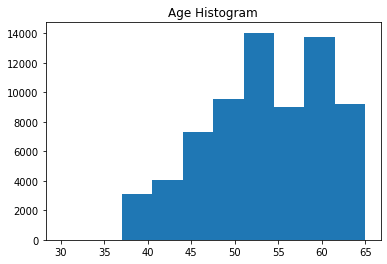

In [42]:
plt.hist(df['age_year'], bins=10)
plt.title('Age Histogram')
# plt.xlabel("Age distrbution of the original data set, unit: years")
# plt.ylabel('Frequency')

The above plot gives good insight into the age distribution of the dataset. We see that most participants are between the ages of 45 and 60 years.

Text(0.5, 1.0, 'Age Count with/without Disease')

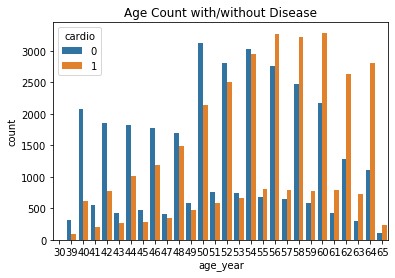

In [43]:
sns.countplot(x='age_year', hue='cardio', data=df)
plt.title('Age Count with/without Disease')

The above plot describes the age distribution while taking the occurence of cardiovascular disease into account. Here the orange bars represent subjects with cardiovascular disease, and the blue bars represent those without it.

This figure tells us that the larger number of those without cardiovascular disease are younger than those who have it, indicating the influence of age.

To get a more standardized unit for size and height, we will calculate the BMI of each person and add the result to a new column called 'bmi'

In [0]:
# Method to compute Body Mass Index (BMI)
def bmi(weight, height):
  height = height / 100 # cm to m
  return weight / (height * height)

In [0]:
# append BMI column to df
bmi_col = [bmi(weight, height) for weight, height in zip(df.weight, df.height)]
df['bmi'] = bmi_col

#### Gender Distribution

In [46]:
gender_dist_cardio = df.gender[df.cardio == 1].value_counts().values
gender_dist_nocardio = df.gender[df.cardio == 0].value_counts().values
gender_map = np.vstack((gender_dist_nocardio, gender_dist_cardio))
gm_df = pd.DataFrame(gender_map, index=['nocardio', 'cardio'], columns=['female', 'male'])
f_cardio_percent = 100 * (gm_df.female.cardio/sum(gm_df.female))
m_cardio_percent = 100 * (gm_df.male.cardio/sum(gm_df.male))

print("In this Dataset,")
print("{0:.1f}% of women have cardiovascular disease.".format(f_cardio_percent))
print("{0:.1f}% of men have cardiovascular disease.".format(m_cardio_percent))
gm_df.head()

In this Dataset,
49.7% of women have cardiovascular disease.
50.5% of men have cardiovascular disease.


,female,male
nocardio,22914,12107
cardio,22616,12363


These numbers tell us that the dataset includes an equal distribution of those who have and do not have cardiovascular disease across gender. This allows us to verify to integrity of our dataset.

However, before we start any data analysis, it is important to make sure that we do not have any outliers to affect our results. By drawing the boxplots on the numeric columns in our data set. The outliers which lie above or below the 1.5 * interquartile range of the list of data in that column, will be marked as individual dots.

Text(0.5, 1.0, 'Systolic blood pressure')

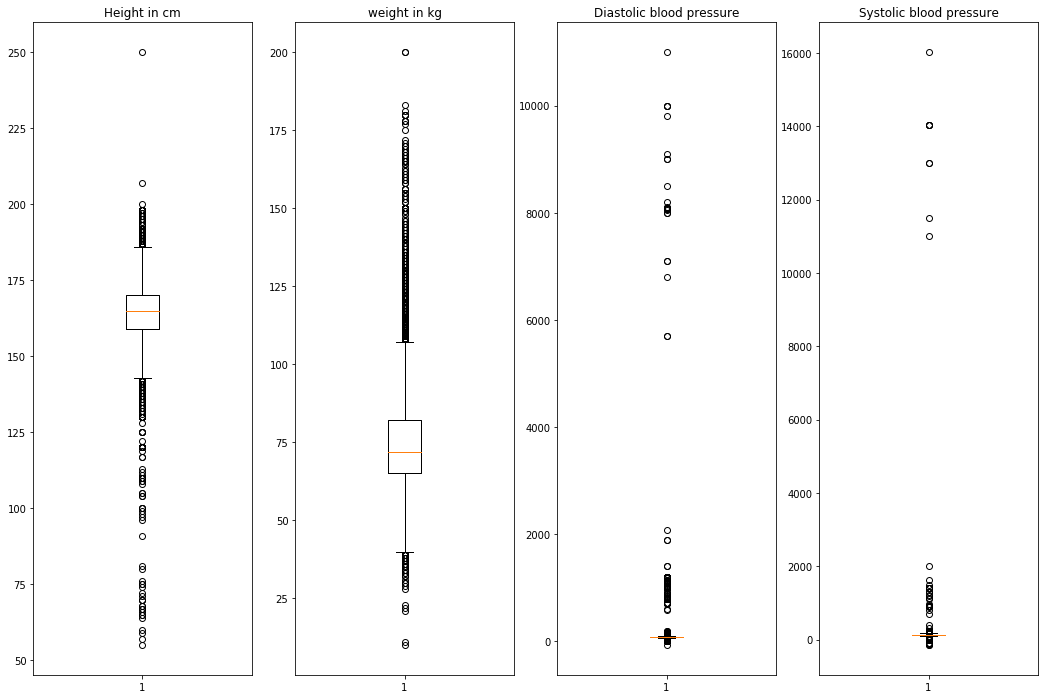

In [47]:
fig, axs = plt.subplots(1,4,figsize=(18,12))

# plot height
axs[0].boxplot(df['height'])
axs[0].set_title('Height in cm')

# plot weight
axs[1].boxplot(df['weight'])
axs[1].set_title('weight in kg')

# plot distolic blood pressure
axs[2].boxplot(df['ap_lo'])
axs[2].set_title('Diastolic blood pressure')

# plot systolic blood pressure
axs[3].boxplot(df['ap_hi'])
axs[3].set_title("Systolic blood pressure")

By observing the four boxplots we can clearly see that each has some outliers. The ranges, considered the normal range for non-outliers, are approximately 145 cm to 185cm for height, 40kg to 110 kg for weight, and we can see the normal range for blood pressure has been squeezed to a single line on blood pressure, because we get a huge range of blood pressure, which seems to be a problem.

# Data Cleaning
Therefore, we need to remove the outliers before any analysis. Thinking critically, we should not just remove the outliers marked by the boxplot, because there are many people who just happened to be very short or very tall, and we should not exclude them because of our statistic. However, there are many people who are below height 75cm, which is below about 2.5 feet tall. Since we already looked at the distribution of age and all of our data point represent an adult, we decide to remove these people with apparently fake height. The similar data cleaning will be applied to the weight column, and both blood pressure columns. We also have people with blood pressure over 10000, which is impossible. We will remove data points like that.

We decide to use 100 to 225 as our normal height range in cm; 
35 to 150 as our normal range in kg; These range are arbitrary, but are reasonable ranges that people could possibly fall into. http://www.bloodpressureuk.org shows that 40 - 100 is the possible range for diastolic blood pressure (ap_lo) and 70 - 190 is the possible range for systolic blood pressure (ap_hi), we noticed that there are records where people can get higher blood pressure than our threshold, but at that moment people must be treated immediately as an emergency and death can happen any time, therefore we will remove extreme case for normal data.


In [48]:
df_clean = df[df.height > 100][df.height < 225]
df_clean = df_clean[df_clean.weight > 35][df_clean.weight < 150]
df_clean = df_clean[df_clean.ap_hi > 70][df_clean.ap_hi < 190]
df_clean = df_clean[df_clean.ap_lo > 40][df_clean.ap_lo < 100]
df_clean

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251


Text(0.5, 1.0, 'Weight Distribution after cleaning data')

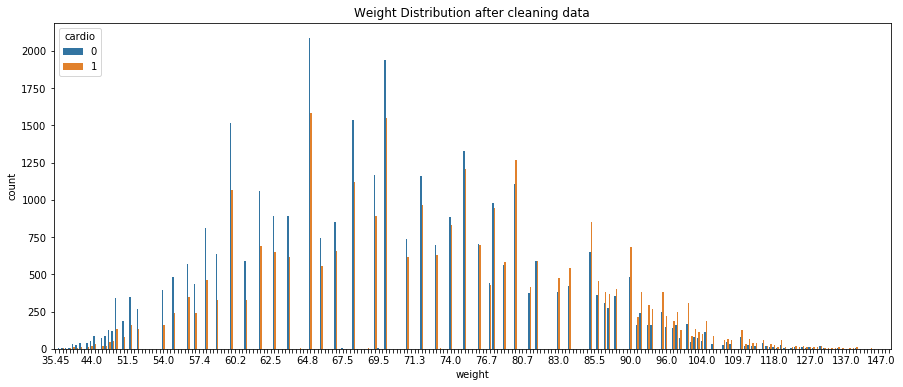

In [49]:
fig, axs = plt.subplots(1, 1,figsize=(15, 6))
weight_plot = sns.countplot(x='weight', hue='cardio', data=df_clean)
for ind, label in enumerate(weight_plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Weight Distribution after cleaning data')

Text(0.5, 1.0, 'Height Distribution after cleaning data')

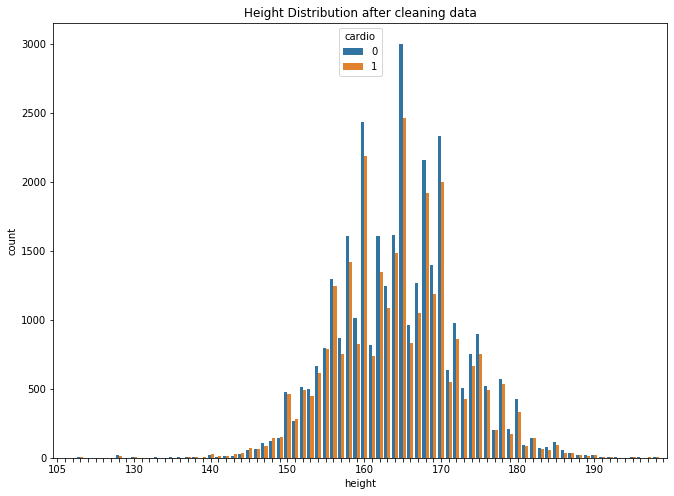

In [50]:
fig, axs = plt.subplots(1, 1,figsize=(11, 8))
height_plot = sns.countplot(x='height', hue='cardio', data=df_clean)
for ind, label in enumerate(height_plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title('Height Distribution after cleaning data')

The distribution of our weights and heights looks good after the data cleaning. Both distributions looks roughly normal without crazy values, and the weight distributions look a little skewed to the right. 

[Text(0, 0.5, 'frequency'), Text(0.5, 0, 'systolic blood pressure')]

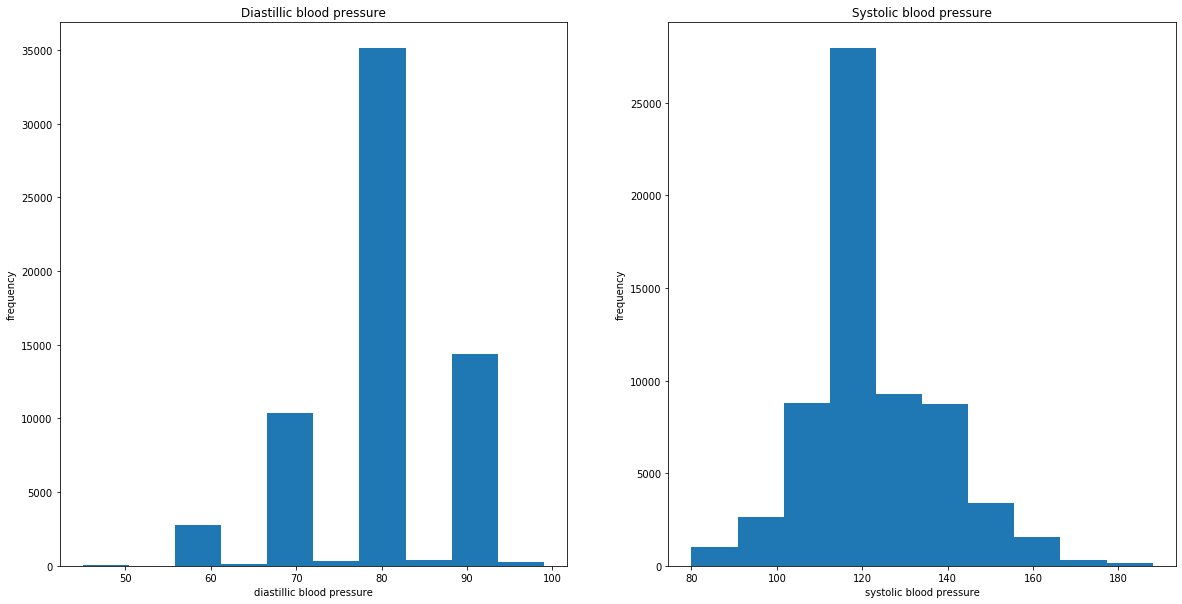

In [51]:
fig, axs = plt.subplots(1, 2,figsize=(20,10))

# plot distolic blood pressure
axs[0].hist(df_clean['ap_lo'])
axs[0].set_title('Diastillic blood pressure')
axs[0].set(xlabel='diastillic blood pressure', ylabel='frequency')

# plot systolic blood pressure
axs[1].hist(df_clean['ap_hi'])
axs[1].set_title("Systolic blood pressure")
axs[1].set(xlabel='systolic blood pressure', ylabel='frequency')

We can see that for the systolic blood pressure, the values are heavily centered, with around 110 - 120. However, it seems that diastilic blood pressure has gaps between each common values. (between 60, 70, 80, 90) We can infer that they round up many observations. To test that, let us count the appearance of each values in the ap_lo columns:

In [52]:
df_clean['ap_lo'].value_counts().head(20)

80    34684
90    14212
70    10202
60     2702
79      357
85      290
75      208
95      160
89      122
69       99
65       78
50       54
82       33
84       32
83       30
87       29
78       27
74       26
86       26
73       22
Name: ap_lo, dtype: int64

By looking at the top twenty frequent values, we can see that many data points are rounded to the tenth value, such as 80, 90, 70, 60. 

As a result, we filtered the table from 69999 rows to 63755 rows, which is still a large enough number to do our data analysis.

After cleaning the data as such, we are able to generate a plot describing the occurence of cardiovascular disease with respect to 'height' and 'weight' without all the outliers observered before.

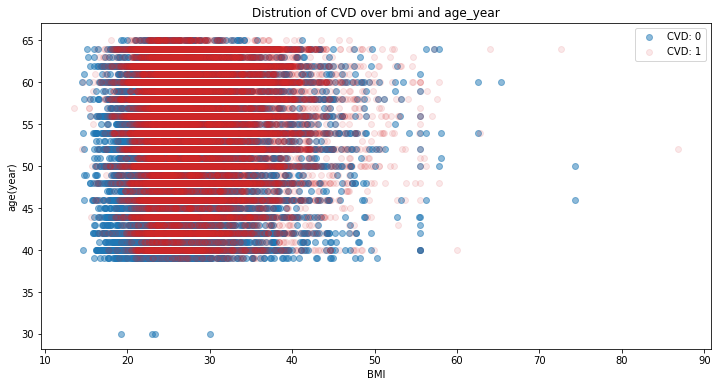

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
cardio = 0
for color in ['tab:blue', 'tab:red']:
  if color == 'tab:red':
    alpha = 0.1
  else:
    alpha = 0.5
  x = df_clean.bmi[df_clean.cardio == cardio]
  y = df_clean.age_year[df_clean.cardio == cardio]
  ax.scatter(x, y, c=color, label='CVD: {}'.format(cardio), alpha=alpha)
  cardio = cardio + 1
ax.legend()
plt.title('Distrution of CVD over bmi and age_year')
ax.set(xlabel='BMI', ylabel='age(year)')
plt.show()

From the above plot, we notice that as age increases, the range of BMI that is susceptible to cardiovascular disease gets wider as well. In addition we see that the majority of cardiovascular disease is diagnosed towards the mean BMI for this dataset, wheres as many healthy individuals are outliers in the BMI distribution.

# Correlation
Here we makes a simple correlation series to see which variables are related to the presence of cardiovascular disease

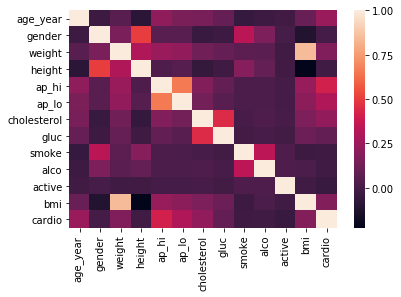

In [54]:
corr_matrix = df_clean[["age_year", "gender", "weight", "height", "ap_hi", "ap_lo",\
           "cholesterol", "gluc", "smoke", "alco", "active", "bmi", "cardio"]].corr()

sns.heatmap(corr_matrix)

#### It looks like `age(_year)`, `weight`, `bmi` and `cholesterol`, `ap_hi` (systolic blood pressure), `ap_lo` (diastolic blood pressure) and `gluc` (glucose)   columns have a much larger impact on the presence of cardiovascular disease than other factors. But they may have hidden effects on the result, so we will train a model w/ or w/o those columns and compare the result.


In [55]:
df_female = df_clean[df_clean.gender == 1]
df_male   = df_clean[df_clean.gender == 2]

print(f'Male   data frame rows: {len(df_male)  }')
print(f'Female data frame rows: {len(df_female)}')

Male   data frame rows: 21963
Female data frame rows: 41792


##### We have almost twice as much data on female patients as male patients, but it might not has as much impact as the correlations show.

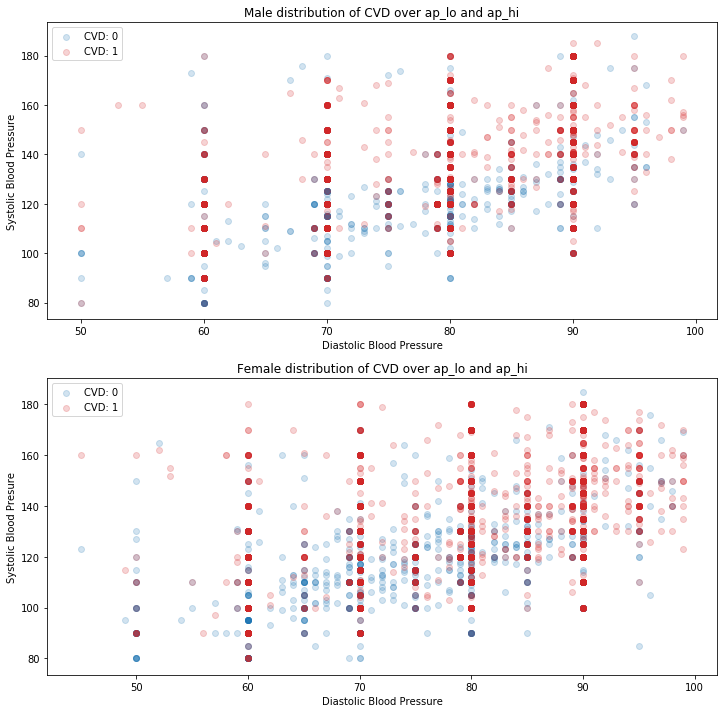

In [73]:
fig, ax = plt.subplots(2, figsize=(12,12))
cardio = 0
for color in ['tab:blue', 'tab:red']:
  x = df_male.ap_lo[df_male.cardio == cardio]
  y = df_male.ap_hi[df_male.cardio == cardio]
  ax[0].scatter(x, y, c=color, label='CVD: {}'.format(cardio), alpha=0.2)
  cardio = cardio + 1
ax[0].legend()
ax[0].set_title('Male distribution of CVD over ap_lo and ap_hi')
ax[0].set(xlabel='Diastolic Blood Pressure', ylabel='Systolic Blood Pressure')

cardio = 0
for color in ['tab:blue', 'tab:red']:
  x = df_female.ap_lo[df_female.cardio == cardio]
  y = df_female.ap_hi[df_female.cardio == cardio]
  ax[1].scatter(x, y, c=color, label='CVD: {}'.format(cardio), alpha=0.2)
  cardio = cardio + 1
ax[1].legend()
ax[1].set_title('Female distribution of CVD over ap_lo and ap_hi')
ax[1].set(xlabel='Diastolic Blood Pressure', ylabel='Systolic Blood Presure')
plt.show()

# Data Normalization

In [57]:
# Splitting and shuffling data

df_shuff = sk.utils.shuffle(df_clean)

scaler = MinMaxScaler()

# Normalizing fields for regression
df_shuff["gender"]   = df["gender"] - 1
df_shuff = df_shuff.drop("age", axis = 1)

df_normalized = scaler.fit_transform(df_shuff)
# df2["age_year"] = min_max_scaler.fit_transform(df2["age_year"].values)
# df2["height"]   = min_max_scaler.fit_transform(df2["height"].values)
# df2["weight"]   = min_max_scaler.fit_transform(df2["weight"].values)
# df2["ap_hi"]    = min_max_scaler.fit_transform(df2["ap_hi"].values)
# df2["ap_low"]   = min_max_scaler.fit_transform(df2["ap_low"].values)

df_normalized = pd.DataFrame(df_normalized)
df_normalized.columns = df_shuff.columns
df_normalized

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
0,1.0,0.794118,0.771026,0.370370,0.648148,0.5,0.0,0.0,0.0,1.0,1.0,0.285714,0.300759
1,0.0,0.470588,0.286658,0.370370,0.648148,0.0,0.0,0.0,0.0,1.0,1.0,0.800000,0.211967
2,1.0,0.637255,0.260238,0.370370,0.648148,0.0,0.0,0.0,0.0,1.0,0.0,0.742857,0.122454
3,0.0,0.441176,0.101717,0.370370,0.648148,0.0,0.0,0.0,0.0,1.0,0.0,0.885714,0.100580
4,1.0,0.617647,0.295465,0.370370,0.648148,0.0,0.0,0.0,0.0,0.0,0.0,0.457143,0.149154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63750,0.0,0.470588,0.242624,0.370370,0.648148,0.0,0.0,0.0,0.0,1.0,0.0,0.742857,0.182810
63751,0.0,0.490196,0.330691,0.370370,0.277778,0.0,0.0,0.0,0.0,1.0,0.0,0.285714,0.230209
63752,0.0,0.490196,0.418758,0.648148,0.833333,0.0,0.0,0.0,0.0,1.0,1.0,0.514286,0.287028
63753,0.0,0.558824,0.321885,0.370370,0.648148,0.0,0.0,0.0,0.0,1.0,1.0,0.742857,0.189937


## Training & Testing set

In [58]:
'''We were thinking we could separate male and female observations
for experimental validity. If so we could uncomment this: '''

labels = df_normalized["cardio"].to_numpy().transpose()
inputs = df_normalized.drop('cardio', axis = 1)
print("Input shape: {0}, Labels shape: {1}".format(inputs.shape, labels.shape))

# Split into folds for training/testing
frac = 0.8
n = labels.shape[0]
split_idx = int(frac * n)

train_inputs = inputs[:split_idx]
train_labels = labels[:split_idx]
test_inputs = inputs[split_idx:n]
test_labels = labels[split_idx:n]

print("Training shapes:")
print("Train inputs shape: {0}, Train labels shape: {1}".format(train_inputs.shape, train_labels.shape))

print("")

print("Test shapes:")
print("Test inputs shape: {0}, Test labels shape {1}".format(test_inputs.shape, test_labels.shape))

Input shape: (63755, 12), Labels shape: (63755,)
Training shapes:
Train inputs shape: (51004, 12), Train labels shape: (51004,)

Test shapes:
Test inputs shape: (12751, 12), Test labels shape (12751,)


### Regression

#### Linear Regression

In [59]:
# Linear Regression
regr = sm.OLS(train_labels, train_inputs).fit()
tr_predictions = regr.predict(train_inputs)
te_predictions = regr.predict(test_inputs)
regr_tr_mse = sk.metrics.mean_squared_error(train_labels, tr_predictions)
regr_te_mse = sk.metrics.mean_squared_error(test_labels, te_predictions)
print(regr.summary())
print("LinReg training mse: {}".format(regr_tr_mse))
print("LinReg testing mse: {}".format(regr_te_mse))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.587
Model:                            OLS   Adj. R-squared (uncentered):              0.587
Method:                 Least Squares   F-statistic:                              6051.
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        01:11:25   Log-Likelihood:                         -30497.
No. Observations:               51004   AIC:                                  6.102e+04
Df Residuals:                   50992   BIC:                                  6.112e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [60]:
# Create linear regression object
regr = linear_model.LinearRegression()

# # Train the model using the training sets
regr.fit(train_inputs, train_labels)

# Make predictions using the testing set
y_pred = regr.predict(test_inputs)

# # The coefficients
print('Coefficients: \n', regr.coef_)
# # The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_labels, y_pred))
# # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_labels, y_pred))

Coefficients: 
 [-7.17936145e-04 -1.89484923e-01  3.61128593e-01  1.22203383e+00
  1.35352326e-01  2.04709309e-01 -4.51957374e-02 -3.20933010e-02
 -4.32297415e-02 -4.27043275e-02  3.69818419e-01 -1.62299480e-01]
Mean squared error: 0.19
Variance score: 0.22


#### Logistic Regression

In [61]:
# Logistic Regression
regr = sm.Logit(train_labels, train_inputs).fit()
tr_predictions = regr.predict(train_inputs)
te_predictions = regr.predict(test_inputs)
logit_mse_tr = sk.metrics.mean_squared_error(train_labels, tr_predictions)
logit_mse_te = sk.metrics.mean_squared_error(test_labels, te_predictions)
print(regr.summary())
print("Logit Train MSE: {}".format(logit_mse_tr))
print("Logit Test MSE: {}".format(logit_mse_te))

Optimization terminated successfully.
         Current function value: 0.566365
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51004
Model:                          Logit   Df Residuals:                    50992
Method:                           MLE   Df Model:                           11
Date:                Fri, 13 Dec 2019   Pseudo R-squ.:                  0.1807
Time:                        01:11:26   Log-Likelihood:                -28887.
converged:                       True   LL-Null:                       -35257.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
gender          0.0298      0.025      1.169      0.242      -0.020       0.080
height         -8.3727    

Using both linear regression and logistic regression, we observe similar training and testing errors in both models.

### SVM

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [0]:
# Method to fit SVM classifier
def train_SVM(X, y, kernel):
  clf = SVC(kernel=kernel, gamma='auto')
  clf.fit(X, y)
  return clf

# MEthod to predict outputs
def predict_outputs_SVM(clf, train_in, test_in):
  y_hat_tr = clf.predict(train_in)
  y_hat_te = clf.predict(test_in)
  return y_hat_tr, y_hat_te

In [0]:
# BEST MODEL ALREADY RECORDED BELOW YOU DON'T REALLY NEED TO RUN THIS AGAIN

# Training

# C_list = [0.1, 1, 10, 100, 1000]
# kernel_list = ['linear', 'rbf', 'poly', 'sigmoid']
# best_acc = 0
# best_svm = {
#     'C': -1,
#     'kernel': -1
# }
# for C in C_list:
#   for kernel in kernel_list:

#     params = {
#         'C':C,
#         'kernel':kernel
#     }

#     clf = train_SVM(train_inputs, train_labels, kernel=kernel)
#     y_hat_tr, y_hat_te = predict_outputs_SVM(
#         clf, 
#         train_inputs, 
#         test_inputs, 
#     )
#     tr_acc = accuracy_score(train_labels, y_hat_tr)
#     te_acc = accuracy_score(test_labels, y_hat_te)

#     print("Model: \n{0}, \tTrain_acc: {1}, \tTest_acc: {2}".format(
#         params, tr_acc, te_acc)
#     )
    
#     if te_acc > best_acc:
#       best_acc = te_acc
#       best_svm['C'] = C
#       best_svm['kernel'] = kernel

# print("\nBest SVM: \nC value: {0}, \nKernel: {1} \nAccuracy: {2:.3f}".format(
#     best_svm['C'], 
#     best_svm['kernel'],
#     best_acc
# ))

The above models show that an SVM is able to predict whether or not a given observation exhibits signs of cardiovascular disease to an accuracy of 0.724. The best SVM was:

However, it is improtant to note that the inputs that the SVM is training on includes all the data including those columns that are not so strongly correlated. 

In [0]:
def count_errors(cm):
  FP = cm.sum(axis=0) - np.diag(cm)  
  FN = cm.sum(axis=1) - np.diag(cm)
  TP = np.diag(cm)
  TN = cm.sum() - (FP + FN + TP)
  return FP, FN, TP, TN

In [0]:
best_svm = SVC(
    C=0.1,
    kernel='rbf',
    gamma='auto'
)

### PCA-SVM

In [0]:
# DO NOT NEED TO RUN AGAIN AS BEST PCA RESULTS HAVE BEEN RECORDED AFTER
# RUNNING THIS CODE BLOCK

from sklearn.decomposition import PCA
# Attempt to reduce dimensionality

# Check for best number of principal components
# to use for prediction

# best_acc = -1
# best_n = -1
# for n in range(1, 12):
#   pca = PCA(n_components=n, svd_solver='auto')
#   X_pca_tr = pca.fit_transform(train_inputs)
#   X_pca_te = pca.fit_transform(test_inputs)

#   clf_pca = best_svm
#   clf_pca.fit(X_pca_tr, train_labels)

#   y_hat_tr_pca, y_hat_te_pca = predict_outputs_SVM(clf_pca, X_pca_tr, X_pca_te)

#   tr_acc = accuracy_score(train_labels, y_hat_tr_pca)
#   te_acc = accuracy_score(test_labels, y_hat_te_pca)
#   if te_acc > best_acc:
#     best_acc = te_acc
#     best_n = n
  
#   print("n_components: {0},\ttrain_acc: {1}, \ttest_acc: {2}".format(n, \
#                                                                      tr_acc,\
#                                                                      te_acc)
#   )

After the above analysis, the best analysis used 10 principal components.

In [68]:
from sklearn.decomposition import PCA
clf = best_svm
pca = PCA(n_components=10)
X_pca_tr = pca.fit_transform(train_inputs)
X_pca_te = pca.fit_transform(test_inputs)
clf.fit(X_pca_tr, train_labels)
y_hat = clf.predict(X_pca_te)
cm_pca = sk.metrics.confusion_matrix(test_labels, y_hat)
cm_npy = cm_pca

TN = cm_npy[0][0]
FN = cm_npy[1][0]
FP = cm_npy[0][1]
TP = cm_npy[1][1]

# False positive and False negative rates
FPR = FP/(TN+FP) * 100
FNR = FN/(TP+FN) * 100

# Sensitivity and specificity
TPR = TP/(FP+TP) * 100
TNR = TN/(FN+TN) * 100

print("\nFalse Positive Rate: {0:.2f}%, \tFalse Negative Rate: {1:.2f}%".format(FPR, FNR))
print("True Positive Rate: {0:.2f}%, \tTrue Negative Rate: {1:.2f}%".format(TPR, TNR))


False Positive Rate: 17.04%, 	False Negative Rate: 40.52%
True Positive Rate: 75.32%, 	True Negative Rate: 70.08%


These statistics reveal that the PCA analysis was not successfull in classifying the obersvations as well as the raw data. This may be because PCA works better for high dimensional data, while this dataset only has 11 features.

In [0]:
clf = best_svm
clf.fit(train_inputs, train_labels)
y_hat = clf.predict(test_inputs)
cm = sk.metrics.confusion_matrix(test_labels, y_hat)

In [70]:
ind = ['Actual_NO', 'Actual_YES']
col = ['Predicted_NO', 'Predictied_YES']
cm = pd.DataFrame(cm, index=ind, columns=col)
cm

,Predicted_NO,Predictied_YES
Actual_NO,5709,1094
Actual_YES,2481,3467


In [71]:
cm_npy = cm.to_numpy()
TN = cm_npy[0][0]
FN = cm_npy[1][0]
FP = cm_npy[0][1]
TP = cm_npy[1][1]

# False positive and False negative rates
FPR = FP/(TN+FP) * 100
FNR = FN/(TP+FN) * 100

# Sensitivity and specificity
TPR = TP/(FP+TP) * 100
TNR = TN/(FN+TN) * 100

print("\nFalse Positive Rate: {0:.2f}%, \tFalse Negative Rate: {1:.2f}%".format(FPR, FNR))
print("True Positive Rate: {0:.2f}%, \tTrue Negative Rate: {1:.2f}%".format(TPR, TNR))


False Positive Rate: 16.08%, 	False Negative Rate: 41.71%
True Positive Rate: 76.01%, 	True Negative Rate: 69.71%


From the results above, we see that the raw data significantly reduces the false positive rate. While the desired accuracy is decent enough to make surface predictions, it is speculated that a more complex classifier is necessary in order to achieve accuracies above 90%.

# Privacy/Ethics Considerations

In order to practice data science without doing anything ethically questionable, we carefully considered the legality, privacy concern, the bias involved in the process of data using. We examined the slides about ethical consideration from COGS 9 and COGS 108 lectures, and decided to use [Deon’s data science ethics checklist](http://deon.drivendata.org/) and the project guideline to help us address all the issues with ethical considerations:
Deon’s  ethics checklist is composed of five parts: data collection, data storage, analysis, modeling, and deployment:
* ## Data Collection:
    * We did not participate in the collection of data, therefore we have no interaction with the people whose data were collected, and we do not know if there was bias in the process of data collection. We just simply obtaining data from the Internet. The data set we use is public on Kaggle and said it was “collected at the moment of medical examination.” According to the term of use on Kaggle, “The materials displayed or performed or available on or through the Services, including text, graphics, data… are protected by copyright and other intellectual property laws. The Services may allow you to copy or download certain Content; please remember that just because this functionality exists, doesn’t mean that all the restrictions above don’t apply — they do!” We will download the dataset and perform data analysis using our software. However, we will not distort the data nor use the data for illegal purposes. The purpose of this project is just to explore the data set and answer simple questions. 
    
    * Personal health is a very private subject. We also want to minimize the exposure of personally identifiable information in the dataset. The columns of the data set are age, height, weight, gender, and etc. All this information has corresponded with the patient’s ID. No other personal details, including the name, or other identifiable information was given in the dataset. The dataset is totally anonymous. 
* ## Data Storage
    * Since we just explore the public data set from Kaggle. We don’t necessarily have a plan to secure the dataset. However, we can assume that the data set is safe because we have downloaded the data set to local computers and if we want to share our foundings with other members in the group, we utilize the Team Google Drive associated with UCSD emails. The data set may be removed from Kaggle for various reasons or if people involved in the data collection requested it. We will delete the data set from our local computer after we finished this project. 
* ## Analysis
    * Because we are looking at the patients, not the whole population, we must have a clear picture of what hypothesis can we make, and what conclusion can we draw. For example, we will not conclude that smoking cause the disease because of general knowledge without exploration, but we will rather separate people into groups by the values of the column and find the indicator. 
	* The visualization will correctly represent the data. We will not remove any rows and columns to maintain maximum neutrality. Our process and codes that lead to the visualization and results will be along with the conclusion and will be detailed.
* ## Modeling
    * We will not discriminate. If we have to group people by gender for this data set, it will only be for biological exploration purposes. The groups we will divide will only reflect that they all have some common factors. Since we are doing data on biological statistics, no conclusion that discriminates people socially, racially, or politically will be made.
* ## Deployment
    * We think that our data visualization and exploration can only lead to the benefit of the readers who are trying to find an association between different factors and cardiovascular diseases. People might find the conclusion to be helpful for giving beneficial health advice. The data and the exploration will not be used for any unethical purpose.



## Conclusions & Discussion

With the classifers built in this experiment, we can help medical personnel predict the chances of a person having cardiovascular disease by analyzing basic information and with data that is easy to obtain. The ability to make these predictions unequivocally shortens the time taken for diagnoisis. This not only helps to save time and money by eliminating the tests that are not required but does so non-invaseively and to a sufficient degree of accuracy.

Among all the classifier we ran, the model with the highest accuracy was the SVM (without PCA) which achieved an accuracy of 72.4%, Type I error of around 16%, and Type II error of around 41%. Based on these statistics, we are able to create models that meet the asserted hypothesis, however the performance can be improved.

We seem to be able to predict the indicator of the disease, but since the fraction of false negatives is relatively high, the result may not be accurate. In order to increase the accuracy, we may research other possible factors, and whether those new variables can be better indicators for cardiovascular disease. Also, there are some limitations that exist in the dataset that we analyzed. The dataset only collects information about patients live in the US, so the environment that people live may also be a factor. Thirdly, the models we used are not as dynamic and robust as newer methods in Machine Learning. Further research might explore how well a custom built neural network will perform given this task.

In conclusion, even though the classifier can provide some insight about the relationship between factors and cardiovascular disease, there should be more improvement on this classifier to make it be more powerful.